In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [3]:
df = pd.read_csv('iris.data.csv',names = ['s_length','s_width','p_length','p_width','i_class'])

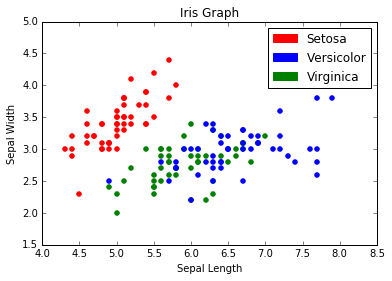

In [4]:
# print(df.i_class.unique())
c_chart = ['red','green','blue']
for idx, val in enumerate(df.i_class.unique()):
    df1 = df[df['i_class'] == val]
    y = df1['s_width']
    x = df1['s_length']
    plt.scatter(x,y, color = c_chart[idx])
plt.title('Iris Graph')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
red_patch = mpatches.Patch(color='red', label='Setosa')
blue_patch = mpatches.Patch(color='blue', label = 'Versicolor')
green_patch = mpatches.Patch(color='green', label = 'Virginica')
plt.legend(handles=[red_patch, blue_patch, green_patch])
plt.show()

In [5]:
# Determine k.
# Calculate the distance between the new observation and all points in the training set.
# Sort the distances to determine the k nearest neighbors based on the k-th minimum distance.
# Determine the class of those neighbors.
# Determine the majority.

In [6]:
def get_majority(dfrnd):

#     print(dfrnd)
    # set the values for length and width from random row for distance calculations

    rnd_length = dfrnd['s_length']
    rnd_width = dfrnd['s_width']
#     print("sepal length in my random row is {}".format(rnd_length))
   

    # calculate the distance between the random point and all points in the array based on pythagorean thereom

    df['length_dif'] = rnd_length - df['s_length']
    df['width_dif'] = rnd_width - df['s_width']
    df['dist'] = np.sqrt(df.length_dif **2 + df.width_dif **2)

    # sort the data by distance
    dfsort = df.sort(['dist'], ascending = [True])

    # create a new df with only k nearest neighbors
    dfk = dfsort.head(k)
#     print("nearest neighbors sorted by distance ")
#     print(dfk)
    
    # Vote on majority class
    setosa_cnt = 0
    versicolor_cnt = 0
    virginica_cnt = 0

    # count number of each type

    setosa_cnt = dfk[df['i_class'] == 'Iris-setosa'].s_length.count()
    versicolor_cnt = dfk[df['i_class'] == 'Iris-versicolor'].s_length.count()
    virginica_cnt = dfk[df['i_class'] == 'Iris-virginica'].s_length.count()
#     print(setosa_cnt, versicolor_cnt, virginica_cnt)

    count_dict = {'Iris-setosa': setosa_cnt, 'Iris-versicolor': versicolor_cnt, 'Iris-virginica': virginica_cnt}
#     print(count_dict)

    majority = max(count_dict, key=lambda key: count_dict[key])
#     print("Majority vote is {} and actual is {}".format(majority, dfrnd['i_class']))


    return(majority)


In [7]:
k = 5

len(df)

150

In [8]:
# df['majority'] = [get_majority(data,k) for index, data in df['i_class'].iteritems()]
# raw_data['Loan.Length'] = [get_int_from_text(data) for index, data in raw_data['Loan.Length'].iteritems()]
df['majority'] = False

for x in range(len(df)):
# for x in range(5):
    majority = get_majority(df.iloc[x])
#     print(majority)
    df.loc[x,'majority'] = majority # loc works here but iloc does not

C:\Users\bob071988\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\bob071988\Anaconda2\lib\site-packages\pandas\core\frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [9]:
# df[df['i_class' != 'majority']].count()
print("Number of mislabeled points out of a total %d points : %d"
% (df.shape[0],(df.i_class != df.majority).sum()))

Number of mislabeled points out of a total 150 points : 23


In [10]:
df[df['i_class'] != df['majority']]

,s_length,s_width,p_length,p_width,i_class,majority,length_dif,width_dif,dist
41,4.5,2.3,1.3,0.3,Iris-setosa,Iris-versicolor,1.4,0.7,1.565248
50,7.0,3.2,4.7,1.4,Iris-versicolor,Iris-virginica,-1.1,-0.2,1.118034
51,6.4,3.2,4.5,1.5,Iris-versicolor,Iris-virginica,-0.5,-0.2,0.538516
52,6.9,3.1,4.9,1.5,Iris-versicolor,Iris-virginica,-1.0,-0.1,1.004988
54,6.5,2.8,4.6,1.5,Iris-versicolor,Iris-virginica,-0.6,0.2,0.632456
56,6.3,3.3,4.7,1.6,Iris-versicolor,Iris-virginica,-0.4,-0.3,0.500000
61,5.9,3.0,4.2,1.5,Iris-versicolor,Iris-virginica,0.0,0.0,0.000000
67,5.8,2.7,4.1,1.0,Iris-versicolor,Iris-virginica,0.1,0.3,0.316228
72,6.3,2.5,4.9,1.5,Iris-versicolor,Iris-virginica,-0.4,0.5,0.640312
74,6.4,2.9,4.3,1.3,Iris-versicolor,Iris-virginica,-0.5,0.1,0.509902


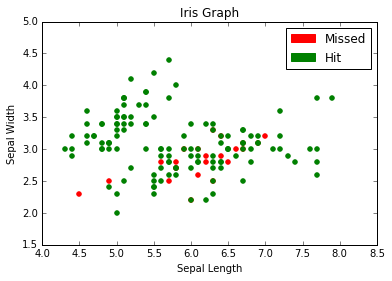

In [11]:
df1 = df[df['i_class'] != df['majority']]
y = df1['s_width']
x = df1['s_length']
plt.scatter(x,y, color = 'red')

df2 = df[df['i_class'] == df['majority']]
y2 = df2['s_width']
x2 = df2['s_length']
plt.scatter(x2,y2, color = 'green')

plt.title('Iris Graph')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
red_patch = mpatches.Patch(color='red', label='Missed')
green_patch = mpatches.Patch(color='green', label = 'Hit')
plt.legend(handles=[red_patch, green_patch])
plt.show()

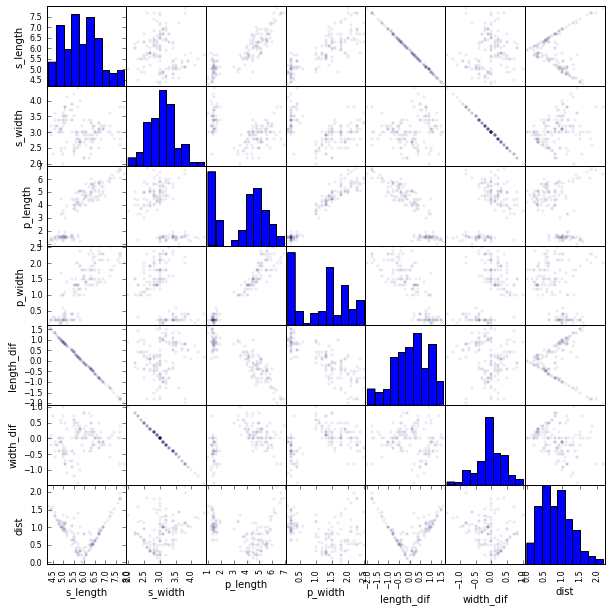

In [14]:
a = pd.scatter_matrix(df, alpha=0.05, figsize=(10,10), diagonal='hist')
